# Imports

In [148]:
import numpy as np
import scipy.io
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec
%matplotlib inline

import os
from os import listdir
from os.path import isfile, join

# Globals

In [149]:
num_channels = 16

# Show all files in data directory

##### File name meaning
- Training:
    - I_J_K.mat
        - I: Patient # (3 total)
        - J: jth's training data #
        - K: 1 for preictal (right before seizure), 0 for interictal (in between seizures)

In [150]:
def sort_file_paths(file_paths):
    indices = np.array([int(file_paths[i].split('_')[-2]) for i in xrange(len(file_paths))])
    new_file_paths = [file_paths[i] for i in np.argsort(indices)]
    return new_file_paths

In [152]:
path = '/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/all_valid'
file_paths = [join(path, f) for f in listdir(path) if isfile(join(path, f))]
file_names = [path.split('/')[-1] for path in file_paths]
interictal_file_paths = sort_file_paths([path for path in file_paths if path.split('_')[-1][0] == str(0)])
preictal_file_paths = sort_file_paths([path for path in file_paths if path.split('_')[-1][0] == str(1)])

for i in xrange(3):
    print interictal_file_paths[i]
    print preictal_file_paths[i]

/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/all_valid/1_1_0.mat
/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/all_valid/1_1_1.mat
/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/all_valid/1_2_0.mat
/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/all_valid/1_2_1.mat
/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/all_valid/1_3_0.mat
/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/all_valid/1_3_1.mat


# Load data

##### Load the channel time-series into pandas df

In [153]:
def mat_to_pandas(path):
    # Load the matlab data
    mat = scipy.io.loadmat(path)
    
    # Get keys in dataStruct key
    names = mat['dataStruct'].dtype.names
    
    # Get data from each subkey in names
    ndata = {n: mat['dataStruct'][n][0, 0] for n in names}
    
    # Create pandas data frame
    return pd.DataFrame(ndata['data'], columns=[str(int(ele-1)) for ele in ndata['channelIndices'][0]])

In [154]:
interictal_df = mat_to_pandas(interictal_file_paths[0])
preictal_df = mat_to_pandas(preictal_file_paths[0])

# Get specific channel from df

In [94]:
def get_channel(dataframe, channel):
    return dataframe[str(channel)].values

# Sequester all all-zeroes data

os.rename("path/to/current/file.foo", "path/to/new/desination/for/file.foo")

In [160]:
def sequester_file(file_path, new_file_directory):
    file_name = file_path.split('/')[-1]
    current_directory = ''
    for ele in file_path.split('/')[0:-1]:
        current_directory += (ele + '/')
    os.rename(file_path, new_file_directory + file_name)

In [159]:
sequester_file(interictal_file_paths[0], '/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/interictal_zeroes')

/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/all_valid/
/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/interictal_zeroes


In [161]:
for i in xrange(len(interictal_file_paths)):
    try:
        interictal_df = mat_to_pandas(interictal_file_paths[i])
        preictal_df = mat_to_pandas(preictal_file_paths[i])
                
        interictal_sequester = False
        # Check interictal all zeroes
        for j in range(num_channels):
            ch_data = get_channel(interictal_df, j)
            if ch_data.std() == 0:
                interical_sequester = True
                
        preictal_sequester = False
        # Check preictal all zeroes
        for j in range(num_channels):
            ch_data = get_channel(preictal_df, j)
            if ch_data.std() == 0:
                preictal_sequester = True
                
        if interictal_sequester == True and preictal_sequester == False:
            sequester_file(interictal_file_paths[i],\
                           '/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/interictal_zeroes/')
            sequester_file(preictal_file_paths[i],\
                           '/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/interictal_zeroes/')
            
        elif interictal_sequester == False and preictal_sequester == True:
            sequester_file(interictal_file_paths[i],\
                           '/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/preictal_zeroes/')
            sequester_file(preictal_file_paths[i],\
                           '/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/preictal_zeroes/')
            
        elif interictal_sequester == True and preictal_sequester == True:
            sequester_file(interictal_file_paths[i],\
                           '/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/both_zeroes/')
            sequester_file(preictal_file_paths[i],\
                           '/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/both_zeroes/')
                
    except:
        sequester_file(interictal_file_paths[i],\
                           '/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/corrupt/')
        sequester_file(preictal_file_paths[i],\
                           '/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/corrupt/')

/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/all_valid/
/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/corrupt/
/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/all_valid/
/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/corrupt/
/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/all_valid/
/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/preictal_zeroes/
/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/all_valid/
/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/preictal_zeroes/
/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/all_valid/
/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/preictal_zeroes/
/home/preston/Desktop/Programming/datasci/projects/eeg_seizure/data/train_1/all_valid/
/home/preston/Desktop/Program

IndexError: list index out of range

# Some plotting

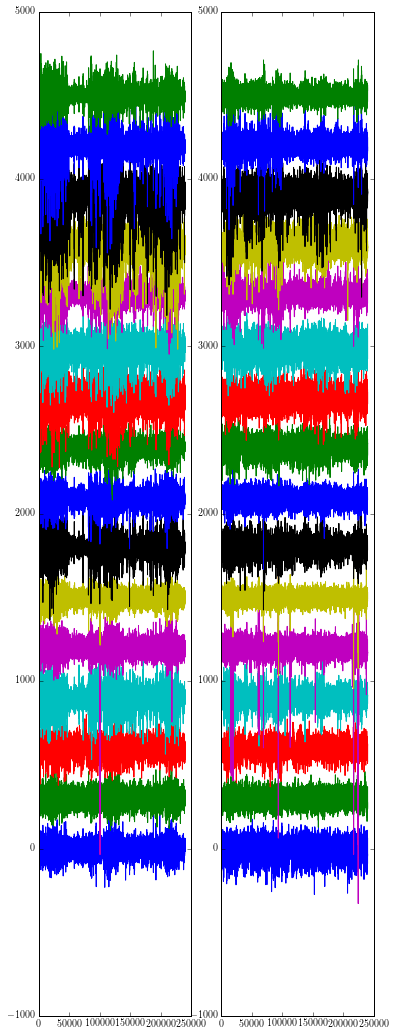

In [126]:
fig = plt.figure(figsize = (6,18))

gs = matplotlib.gridspec.GridSpec(1, 2)

ax0 = plt.subplot(gs[0])
for i in xrange(num_channels):
    plt.plot(get_channel(interictal_df, i)+i*300)
    
ax1 = plt.subplot(gs[1])
for i in xrange(num_channels):
    plt.plot(get_channel(preictal_df, i)+i*300)
    
plt.show()